In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
df = pd.read_csv("merged.csv", header=0)
df

,Agent,TotalCalls,UsefulCalls,ConnectedCallTimeMins,UsefulCallTimeMins,ConnectedCalls,MedianConnectedCallTime,TotalEmails,Booking,TotalRevenue,AverageTicket,TotalNewLeads,GrossCRLead_per,L2A_per,A2PA_per,PaidApps,AllApps
0,Adriana Hernandez,214.0,214.0,29.300000,80.316667,9.0,2.600000,257.0,11540.0,11540.0,11540.000000,117,0.854701,14.529915,5.882353,1,17
1,Alberto Conde,3159.0,3055.0,1468.833333,2174.333333,205.0,4.066667,3148.0,149103.0,129934.0,8283.500000,1319,1.364670,8.263836,16.513761,18,109
2,Alejandra Almonte,3742.0,3737.0,835.833333,1437.683333,215.0,2.983333,2171.0,114173.0,109101.0,2594.840909,1342,3.278689,10.357675,31.654676,44,139
3,Amanda Campos,6012.0,5911.0,1397.650000,2470.483333,315.0,3.383333,3937.0,31020.0,23486.0,2068.000000,1916,0.782881,5.584551,14.018692,15,107
4,Amanda Da Rosa,449.0,445.0,235.183333,313.683333,54.0,2.833333,13.0,0.0,0.0,0.000000,109,0.000000,7.339450,0.000000,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Veronica Miquilena,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,2,0.000000,0.000000,0.000000,0,0
138,Verónica Miquilena,8929.0,8857.0,4049.766667,6431.733333,825.0,3.033333,8.0,341709.0,253494.0,6973.653061,3557,1.377565,4.723081,29.166667,49,168
139,Victor Fernandes,6066.0,5999.0,2432.750000,4517.466667,513.0,2.966667,25.0,240254.0,156266.0,15015.875000,2373,0.674252,3.497682,19.277108,16,83
140,Wolfang Freites,6783.0,6651.0,2904.733333,4789.350000,480.0,3.766667,5294.0,72799.0,66826.0,2141.147059,2168,1.568266,5.258303,29.824561,34,114


### Data preprocessing and transformations
Common to all models

In [3]:
# Define performance label
threshold = 2.5
df["performance"] = df["GrossCRLead_per"].apply(
    lambda x: "high" if x > threshold else "low"
)

# Encode the performance labels
label_encoder = (
    LabelEncoder()
)  # use OneHotEncoder(sparse=False) for multiple categories
df["performance"] = label_encoder.fit_transform(df["performance"])

# Separate features and target variable, drop useless features
X = df.drop(["Agent", "performance", "GrossCRLead_per"], axis=1)
y = df["performance"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["number"]).columns

### Logistic Regression

Best for: Binary classification problems.
Data Types: Works well with linearly separable data and can handle both continuous and categorical features.

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Initialize and train the model with increased max_iter
model = LogisticRegression(random_state=42, max_iter=2000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [6]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate F1 score, recall, and precision
f1 = f1_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")


# Coefficients of the features
coefficients = model.coef_[0]
for feature, coef in zip(
    df.drop(columns=["Agent", "performance"]).columns, coefficients
):
    print(f"{feature}: {coef}")

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.95      1.00      0.98        20

    accuracy                           0.97        29
   macro avg       0.98      0.94      0.96        29
weighted avg       0.97      0.97      0.96        29

[[ 8  1]
 [ 0 20]]
F1 Score: 0.975609756097561
Recall: 1.0
Precision: 0.9523809523809523
TotalCalls: 0.7912102742174383
UsefulCalls: 0.770135073029905
ConnectedCallTimeMins: -0.06688484963669045
UsefulCallTimeMins: 0.37665134937515465
ConnectedCalls: -0.30441145439106093
MedianConnectedCallTime: -0.11851902356430881
TotalEmails: -0.1380046808629456
Booking: 0.2823391796693245
TotalRevenue: -0.31250502161474264
AverageTicket: 0.1048818147138618
TotalNewLeads: 0.7542993903374122
GrossCRLead_per: -0.2622331676015933
L2A_per: -1.1717600688494023
A2PA_per: -2.500495616886266
PaidApps: -1.0172213802113428


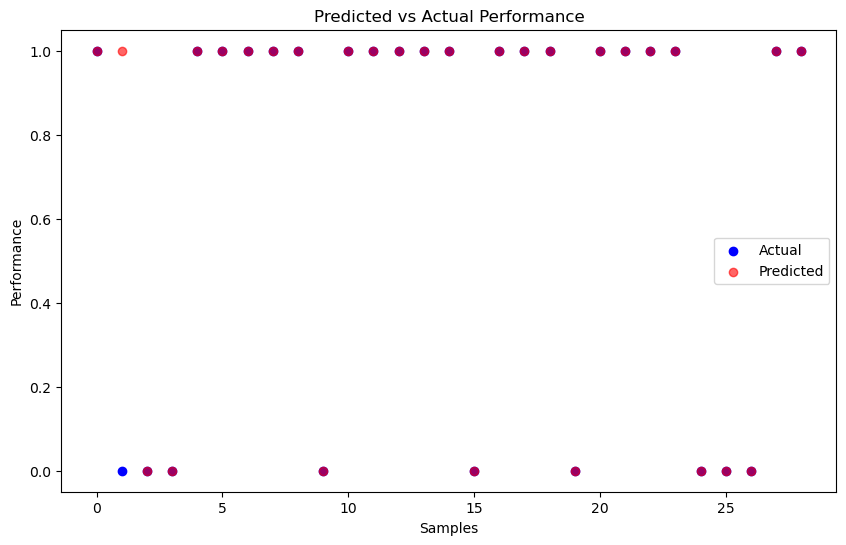

In [7]:
# Plot predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_test)), y_pred, color="red", alpha=0.6, label="Predicted")
plt.xlabel("Samples")
plt.ylabel("Performance")
plt.title("Predicted vs Actual Performance")
plt.legend()
plt.show()

### Decision Trees

Best for: Both binary and multi-class classification.
Data Types: Handles categorical and continuous data. Easy to interpret and visualize.

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [10]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate F1 score, recall, and precision
f1 = f1_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# Feature importance
feature_importances = model.feature_importances_
for feature, importance in zip(
    df.drop(columns=["performance"]).columns, feature_importances
):
    print(f"{feature}: {importance}")

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.86      0.95      0.90        20

    accuracy                           0.86        29
   macro avg       0.86      0.81      0.83        29
weighted avg       0.86      0.86      0.86        29

[[ 6  3]
 [ 1 19]]
F1 Score: 0.9047619047619048
Recall: 0.95
Precision: 0.8636363636363636
Agent: 0.0
TotalCalls: 0.0
UsefulCalls: 0.039265326383718054
ConnectedCallTimeMins: 0.03365599404318689
UsefulCallTimeMins: 0.0
ConnectedCalls: 0.0
MedianConnectedCallTime: 0.0
TotalEmails: 0.0
Booking: 0.0
TotalRevenue: 0.0
AverageTicket: 0.0
TotalNewLeads: 0.37823639287105243
GrossCRLead_per: 0.5086465113649596
L2A_per: 0.04019577533708307
A2PA_per: 0.0


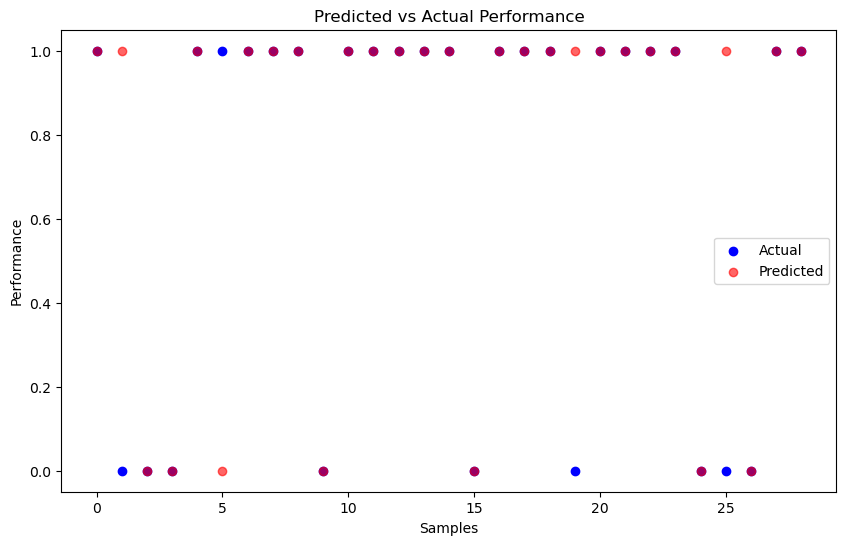

In [11]:
# Plot predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_test)), y_pred, color="red", alpha=0.6, label="Predicted")
plt.xlabel("Samples")
plt.ylabel("Performance")
plt.title("Predicted vs Actual Performance")
plt.legend()
plt.show()

### Random Forest

Best for: Handling high-dimensional spaces and large datasets.
Data Types: Robust to overfitting and works well with both continuous and categorical features.

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate F1 score, recall, and precision
f1 = f1_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# Feature importance
feature_importances = model.feature_importances_
for feature, importance in zip(
    df.drop(columns=["performance"]).columns, feature_importances
):
    print(f"{feature}: {importance}")

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.87      1.00      0.93        20

    accuracy                           0.90        29
   macro avg       0.93      0.83      0.87        29
weighted avg       0.91      0.90      0.89        29

[[ 6  3]
 [ 0 20]]
F1 Score: 0.9302325581395349
Recall: 1.0
Precision: 0.8695652173913043
Agent: 0.03232398591006592
TotalCalls: 0.02915145753853963
UsefulCalls: 0.030626268691172163
ConnectedCallTimeMins: 0.027895098448311097
UsefulCallTimeMins: 0.02554187837045638
ConnectedCalls: 0.021928744609609807
MedianConnectedCallTime: 0.0181510662928878
TotalEmails: 0.05999386360496647
Booking: 0.06501889279550409
TotalRevenue: 0.04369480248443726
AverageTicket: 0.02256311635986747
TotalNewLeads: 0.20359663831639696
GrossCRLead_per: 0.247273564616818
L2A_per: 0.12811031895960848
A2PA_per: 0.04413030300135856


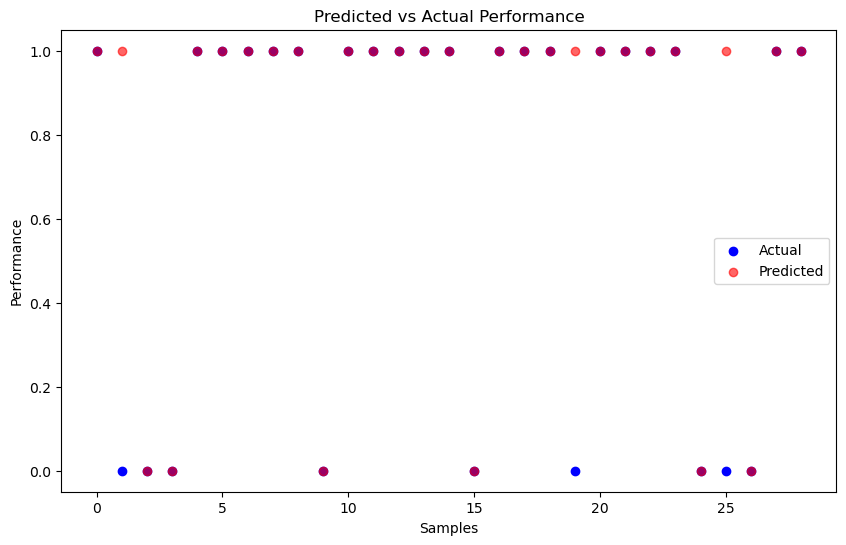

In [15]:
# Plot predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_test)), y_pred, color="red", alpha=0.6, label="Predicted")
plt.xlabel("Samples")
plt.ylabel("Performance")
plt.title("Predicted vs Actual Performance")
plt.legend()
plt.show()

### Gradient Boosting Machines (e.g., XGBoost, LightGBM)

Best for: Large datasets with complex relationships between features.
Data Types: Effective with continuous and categorical data, often used in competitions for its accuracy.

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Initialize and train the model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate F1 score, recall, and precision
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# Feature importance
feature_importances = model.feature_importances_
for feature, importance in zip(
    df.drop(columns=["performance"]).columns, feature_importances
):
    print(f"{feature}: {importance}")

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.87      1.00      0.93        20

    accuracy                           0.90        29
   macro avg       0.93      0.83      0.87        29
weighted avg       0.91      0.90      0.89        29

[[ 6  3]
 [ 0 20]]
F1 Score: 0.9302325581395349
Recall: 1.0
Precision: 0.8695652173913043
Agent: 0.0
TotalCalls: 0.0
UsefulCalls: 0.03333466500043869
ConnectedCallTimeMins: 0.0
UsefulCallTimeMins: 0.0
ConnectedCalls: 0.03641807660460472
MedianConnectedCallTime: 0.0
TotalEmails: 0.00413830392062664
Booking: 0.025739029049873352
TotalRevenue: 0.0
AverageTicket: 0.0
TotalNewLeads: 0.36110150814056396
GrossCRLead_per: 0.48188653588294983
L2A_per: 0.05738189443945885
A2PA_per: 0.0


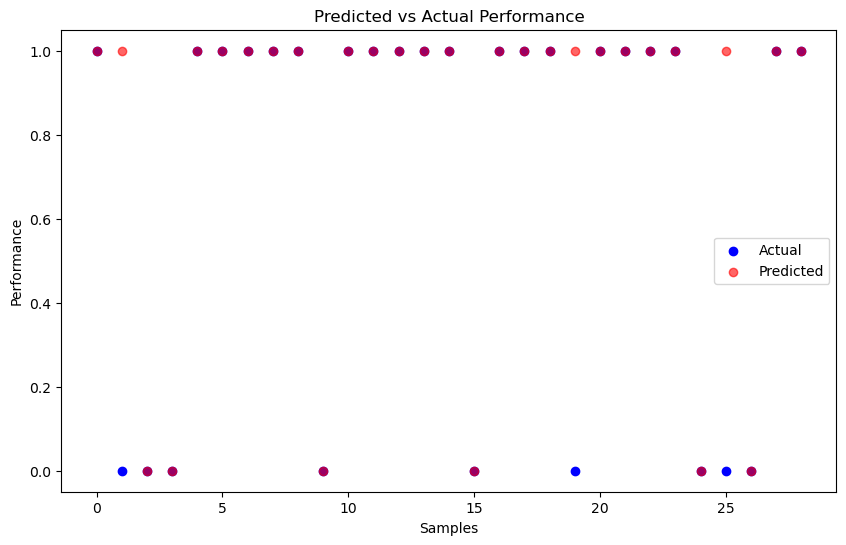

In [19]:
# Plot predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_test)), y_pred, color="red", alpha=0.6, label="Predicted")
plt.xlabel("Samples")
plt.ylabel("Performance")
plt.title("Predicted vs Actual Performance")
plt.legend()
plt.show()

### Support Vector Machines (SVM)

Best for: Binary classification and multi-class classification using one-vs-one or one-vs-all strategies.
Data Types: Effective in high-dimensional spaces and works well with a clear margin of separation.

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Initialize and train the model
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [22]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate F1 score, recall, and precision
f1 = f1_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.95      1.00      0.98        20

    accuracy                           0.97        29
   macro avg       0.98      0.94      0.96        29
weighted avg       0.97      0.97      0.96        29

[[ 8  1]
 [ 0 20]]
F1 Score: 0.975609756097561
Recall: 1.0
Precision: 0.9523809523809523


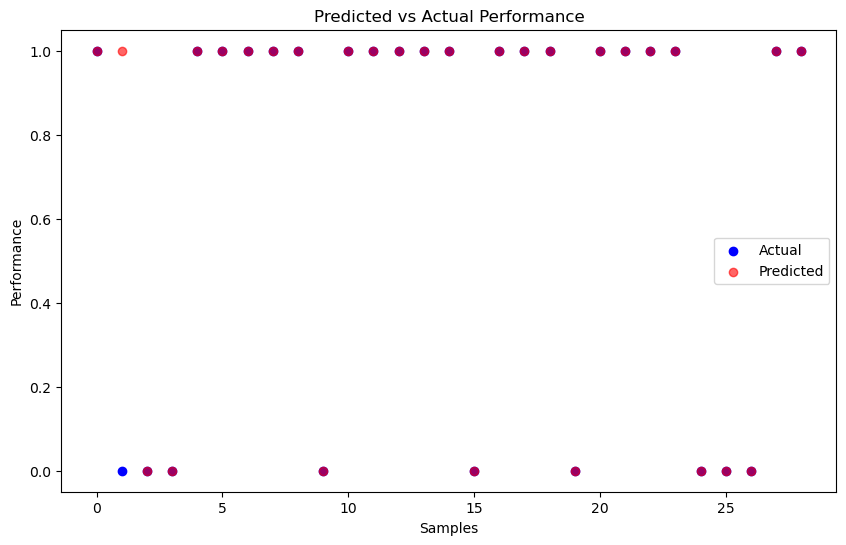

In [23]:
# Plot predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_test)), y_pred, color="red", alpha=0.6, label="Predicted")
plt.xlabel("Samples")
plt.ylabel("Performance")
plt.title("Predicted vs Actual Performance")
plt.legend()
plt.show()

### K-Nearest Neighbors (KNN)

Best for: Smaller datasets with a well-defined distance metric.
Data Types: Works with continuous and categorical data but is computationally intensive for large datasets.

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Initialize and train the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [26]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate F1 score, recall, and precision
f1 = f1_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.95      1.00      0.98        20

    accuracy                           0.97        29
   macro avg       0.98      0.94      0.96        29
weighted avg       0.97      0.97      0.96        29

[[ 8  1]
 [ 0 20]]
F1 Score: 0.975609756097561
Recall: 1.0
Precision: 0.9523809523809523


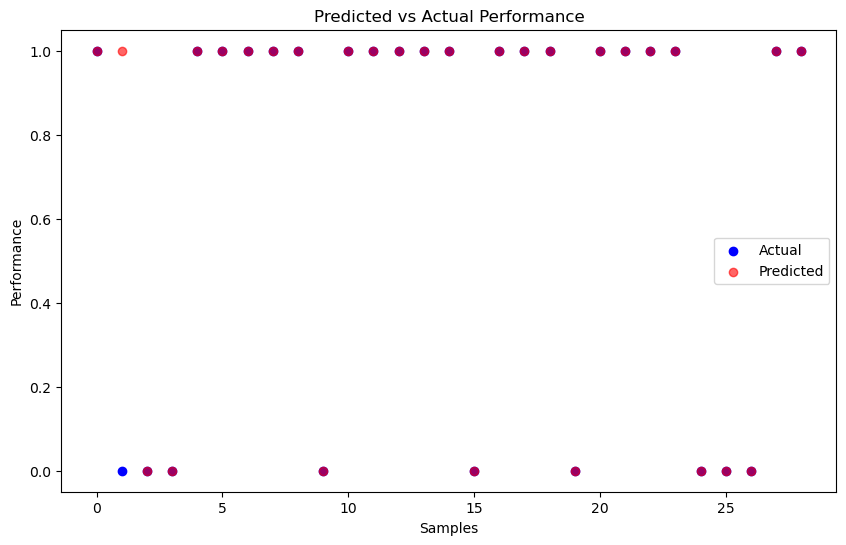

In [27]:
# Plot predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_test)), y_pred, color="red", alpha=0.6, label="Predicted")
plt.xlabel("Samples")
plt.ylabel("Performance")
plt.title("Predicted vs Actual Performance")
plt.legend()
plt.show()

### Naive Bayes

Best for: Text classification and problems with categorical features.
Data Types: Assumes feature independence, works well with high-dimensional data.

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Initialize and train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [30]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate F1 score, recall, and precision
f1 = f1_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.90      0.90      0.90        20

    accuracy                           0.86        29
   macro avg       0.84      0.84      0.84        29
weighted avg       0.86      0.86      0.86        29

[[ 7  2]
 [ 2 18]]
F1 Score: 0.9
Recall: 0.9
Precision: 0.9


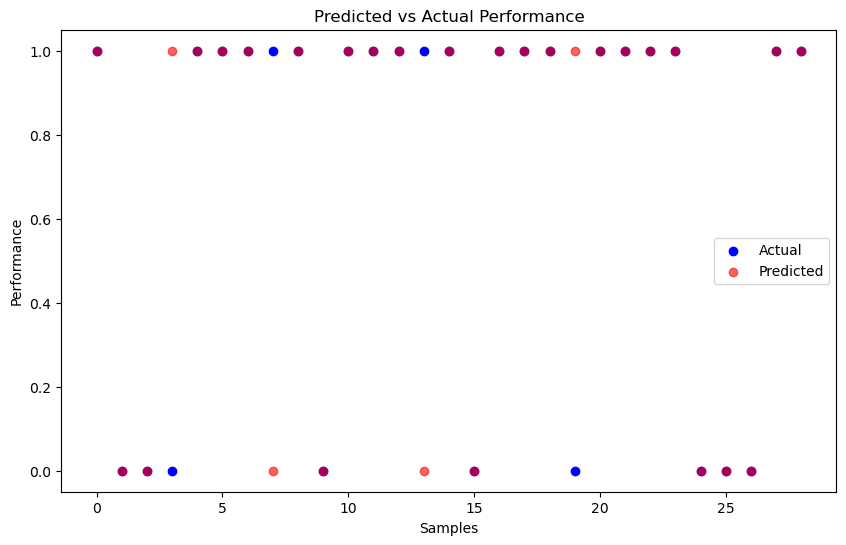

In [31]:
# Plot predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_test)), y_pred, color="red", alpha=0.6, label="Predicted")
plt.xlabel("Samples")
plt.ylabel("Performance")
plt.title("Predicted vs Actual Performance")
plt.legend()
plt.show()

### Linear Discriminant Analysis (LDA)

Best for: Dimensionality reduction and classification.
Data Types: Works well with continuous features and assumes normally distributed classes.

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Initialize and train the model
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [34]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate F1 score, recall, and precision
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.95      1.00      0.98        20

    accuracy                           0.97        29
   macro avg       0.98      0.94      0.96        29
weighted avg       0.97      0.97      0.96        29

[[ 8  1]
 [ 0 20]]
F1 Score: 0.975609756097561
Recall: 1.0
Precision: 0.9523809523809523


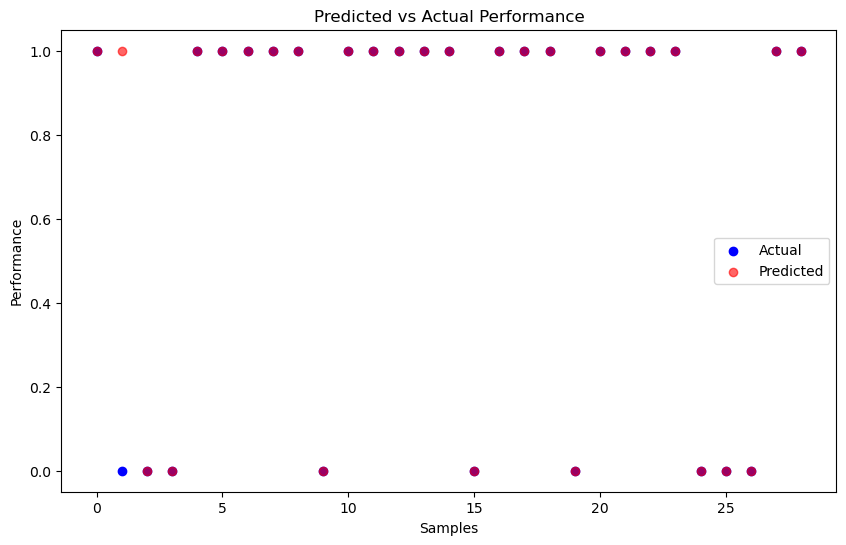

In [35]:
# Plot predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_test)), y_pred, color="red", alpha=0.6, label="Predicted")
plt.xlabel("Samples")
plt.ylabel("Performance")
plt.title("Predicted vs Actual Performance")
plt.legend()
plt.show()

### Quadratic Discriminant Analysis (QDA)

Best for: Similar to LDA but with non-linear boundaries.
Data Types: Assumes each class has its own covariance matrix, suitable for continuous data with different variances among classes.

In [36]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Initialize and train the model
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate F1 score, recall, and precision
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.88      0.75      0.81        20

    accuracy                           0.76        29
   macro avg       0.73      0.76      0.74        29
weighted avg       0.79      0.76      0.77        29

[[ 7  2]
 [ 5 15]]
F1 Score: 0.8108108108108109
Recall: 0.75
Precision: 0.8823529411764706


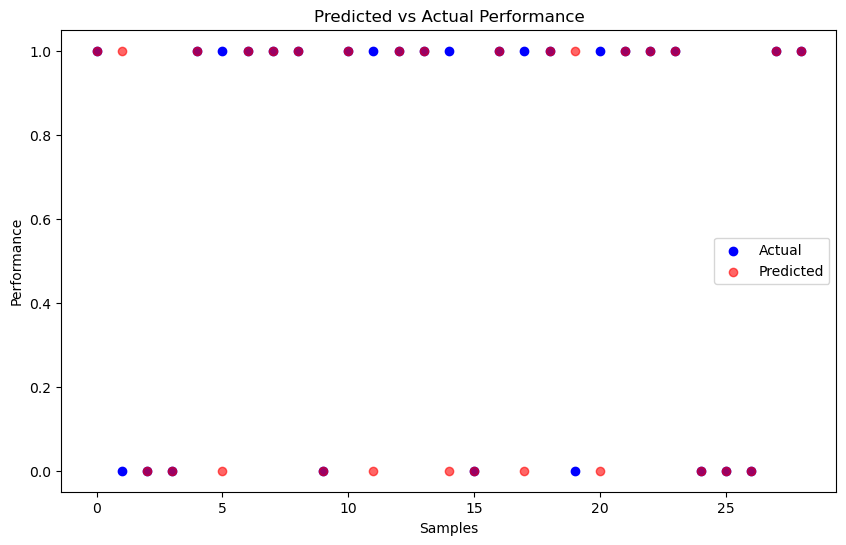

In [39]:
# Plot predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_test)), y_pred, color="red", alpha=0.6, label="Predicted")
plt.xlabel("Samples")
plt.ylabel("Performance")
plt.title("Predicted vs Actual Performance")
plt.legend()
plt.show()